# Clustering mit K-Means und Klassifikation mit K-Nearest-Neighbors

## Datensatz erzeugen

In [72]:
import numpy as np
from sklearn import datasets

In [73]:
_x, _y = datasets.make_blobs(n_samples=1000, centers=3, cluster_std=[2.0, 1.0, 3.0], random_state=17, shuffle=True)
x = np.vstack((_x[_y==0], _x[_y==1][:100], _x[_y==2][:200]))
y = [0] * len(_x[_y==0]) + [1] * 100 + [2] * 200

### Daten visualisieren

In [74]:
import matplotlib.pyplot as plt

In [75]:
x.shape

(634, 2)

In [76]:
len(y)

634

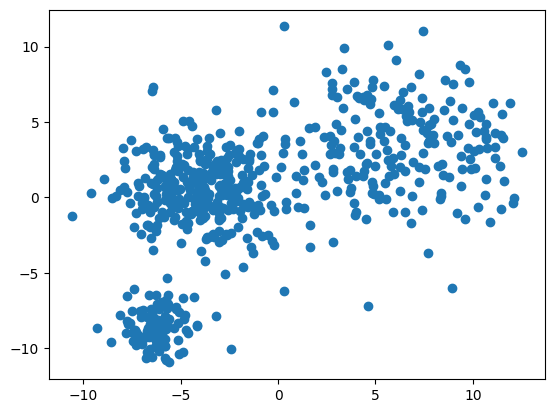

In [77]:
plt.scatter(x[:,0], x[:,1])

## Clustering

In [78]:
from sklearn.cluster import KMeans

In [79]:
model = KMeans(n_clusters=2, n_init=1)

In [80]:
model.fit(x)

KMeans(n_clusters=2, n_init=1)

In [81]:
y_pred = model.predict(x)

In [82]:
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [83]:
import numpy as np

In [84]:
np.unique(y_pred)

array([0, 1], dtype=int32)

In [85]:
np.unique(y)

array([0, 1, 2])

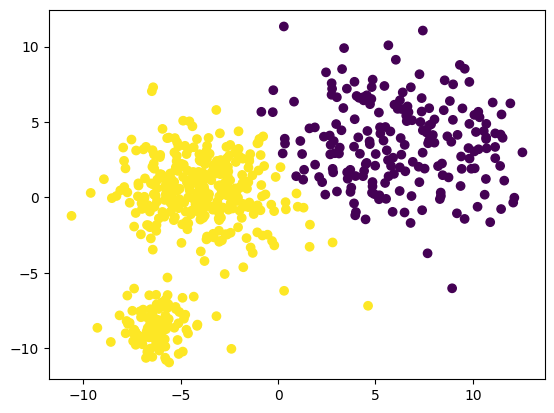

In [86]:
plt.scatter(x[:,0], x[:,1], c=y_pred)

### Optimale Anzahl Cluster finden

In [87]:
_x, _y = datasets.make_blobs(n_samples=1000, centers=3, cluster_std=[1.0, 0.5, 2.0], random_state=17, shuffle=True)
x = np.vstack((_x[_y==0], _x[_y==1][:100], _x[_y==2][:200]))
y = [0] * len(_x[_y==0]) + [1] * 100 + [2] * 200

In [88]:
possible_n_clusters = [2, 3, 4, 5]

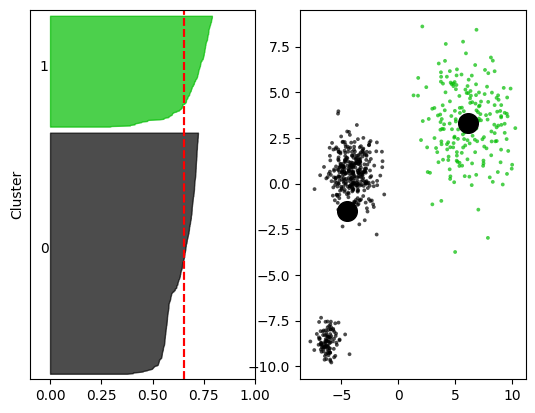

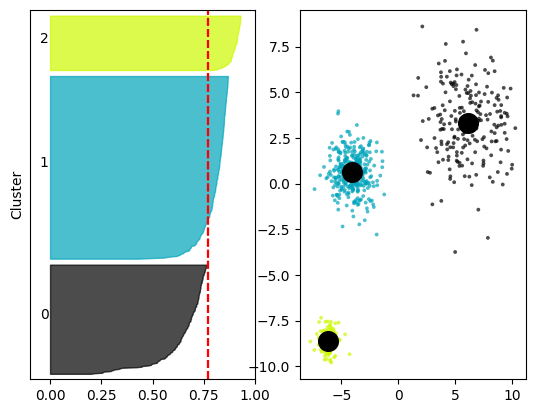

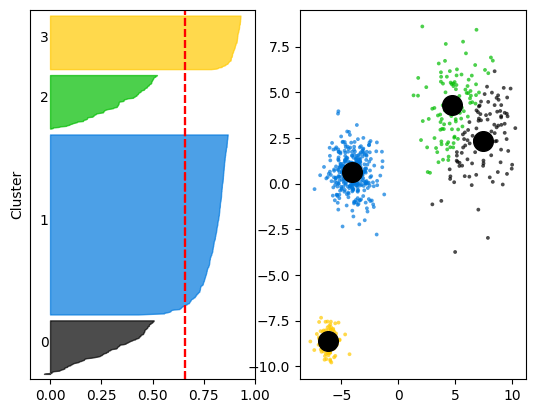

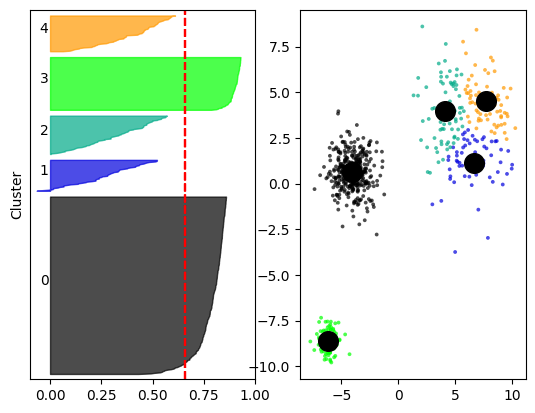

In [89]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in possible_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])
    
    model = KMeans(n_clusters=n_clusters, n_init="auto")
    model.fit(x)
    
    y_pred = model.predict(x)
    
    silhouette_avg = silhouette_score(x, y_pred)
    sample_silhouette_values = silhouette_samples(x, y_pred)
    
    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        
        
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_ylabel("Cluster")
    ax1.set_yticks([])
    
    colors = cm.nipy_spectral(y_pred.astype(float) / n_clusters)
    ax2.scatter(
        x[:, 0], x[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    
    centers = model.cluster_centers_
    ax2.scatter(centers[:,0], centers[:,1], marker="o", c="black", s=200)

**Aufgabe:** Verwende `KMeans`, um den Datensatz `x` zu clustern.

In [90]:
x = np.loadtxt("04_data.txt")

In [91]:
model = KMeans(n_clusters=4, n_init=1)

In [92]:
model.fit(x)

KMeans(n_clusters=4, n_init=1)

In [93]:
from sklearn.mixture import GaussianMixture

In [94]:
model_gauss = GaussianMixture(n_components=4)

In [95]:
model_gauss.fit(x)

GaussianMixture(n_components=4)

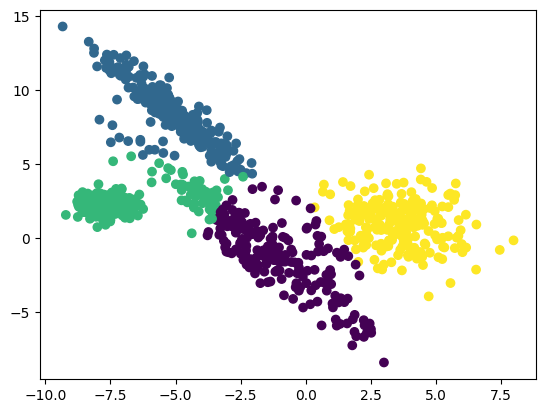

In [96]:
plt.scatter(x[:,0], x[:,1], c=model.predict(x))

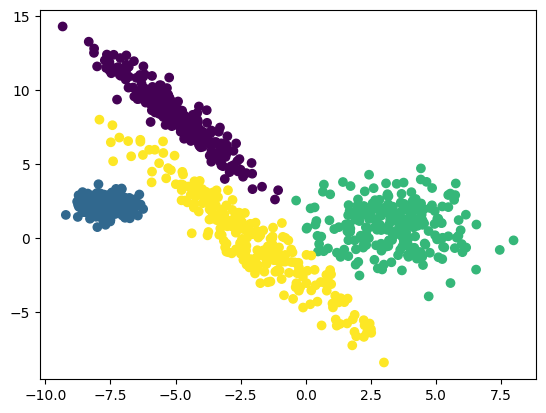

In [97]:
plt.scatter(x[:,0], x[:,1], c=model_gauss.predict(x))

In [98]:
model_gauss.means_

array([[-5.02046094,  8.36265191],
       [-7.69462002,  2.20535114],
       [ 3.30137807,  0.87437911],
       [-2.15346291, -0.02852204]])

In [99]:
model_gauss.covariances_

array([[[ 2.07309205e+00, -2.84929008e+00],
        [-2.84929008e+00,  4.36779660e+00]],

       [[ 2.81830067e-01, -2.12340498e-03],
        [-2.12340498e-03,  2.24623021e-01]],

       [[ 2.29263156e+00, -9.40204323e-02],
        [-9.40204323e-02,  2.22029694e+00]],

       [[ 4.75338176e+00, -6.45837099e+00],
        [-6.45837099e+00,  9.83787686e+00]]])

## Klassifikation mit K-Nearest-Neighbors

### Datenset laden

In [100]:
from sklearn.datasets import load_wine

In [101]:
wine_data = load_wine(as_frame=True)

In [102]:
wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [103]:
wine_data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [104]:
#print(wine_data.DESCR)

In [105]:
wine_data.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [106]:
wine_data.target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [107]:
x, y = wine_data.data[["proline", "hue"]], wine_data.target

In [108]:
x.head()

,proline,hue
0,1065.0,1.04
1,1050.0,1.05
2,1185.0,1.03
3,1480.0,0.86
4,735.0,1.04


In [109]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'hue')

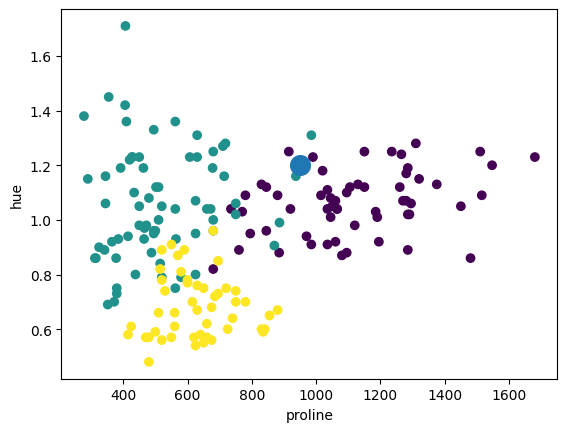

In [110]:
plt.scatter(x["proline"], x["hue"], c=y)
plt.scatter([950], [1.2], s=200)
plt.xlabel("proline")
plt.ylabel("hue")

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, stratify=y)

### Modell trainieren

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
model = KNeighborsClassifier(n_neighbors=20)

In [115]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [116]:
model.classes_

array([0, 1, 2])

### Modell quantitativ evaluieren

**Aufgabe:** Berechne Accuracy, Precision, und Recall auf den Test- und Trainingsdaten

In [117]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [118]:
for label, dataset in [("train", (x_train, y_train)), ("test", (x_test, y_test))]:
    print(f"{label}:")
    x, y = dataset
    y_0 = np.where(y == 0, 0, 1)
    for name, metric in [("accuracy", accuracy_score), ("recall", recall_score), ("precision", precision_score)]:
        print(f"- {name}:", metric(y_0, np.where(model.predict(x) == 0, 0, 1)))

train:
- accuracy: 0.9022556390977443
- recall: 0.9213483146067416
- precision: 0.9318181818181818
test:
- accuracy: 0.9555555555555556
- recall: 1.0
- precision: 0.9375


In [119]:
import numpy as np

In [120]:
y_train_0 = np.where(y_train == 0, 0, 1)

In [121]:
recall_score(y_train_0, y_train_0)

1.0

In [122]:
y_train[:10].values

array([0, 1, 1, 0, 1, 0, 0, 2, 2, 2])

In [123]:
y_train_0[:10]

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1])

### Confusion-Matrix

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
confusion_matrix(y_train, model.predict(x_train))

array([[38,  1,  5],
       [ 4, 37, 12],
       [ 3, 19, 14]])

In [126]:
from sklearn.metrics import ConfusionMatrixDisplay

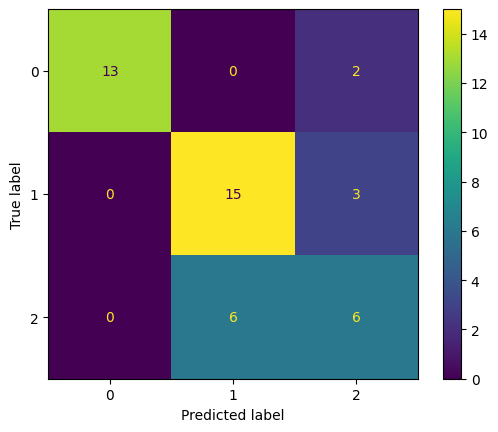

In [127]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(x_test)))
cm.plot()

### Modell visuell evaluieren

In [128]:
import matplotlib.pyplot as plt

In [129]:
from sklearn.inspection import DecisionBoundaryDisplay

(0.54, 1.71)

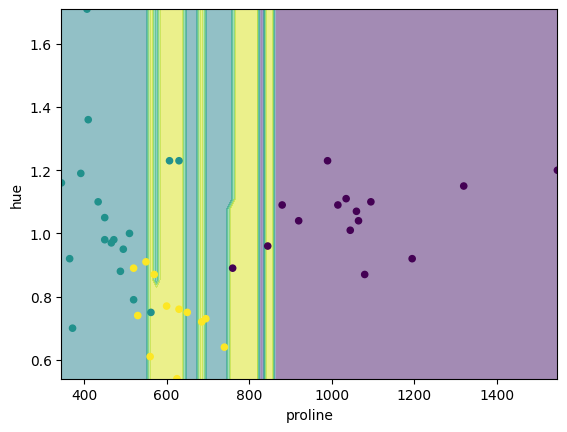

In [130]:
fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    x_test,
    response_method="predict",
    alpha=0.5,
    ax=ax,
)
disp.ax_.scatter(x_test["proline"], x_test["hue"], c=y_test, s=20)
#disp.ax_.scatter(x_train["proline"], x_train["hue"], c=y_train, s=20)
disp.ax_.set_xlim(x["proline"].min(), x["proline"].max())
disp.ax_.set_ylim(x["hue"].min(), x["hue"].max())

### Skalierung von Features

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
scaler = StandardScaler()

In [133]:
scaler.set_output(transform="pandas")

StandardScaler()

In [134]:
scaler.fit(x_train)

StandardScaler()

In [135]:
x_train_scaled = scaler.transform(x_train)

In [136]:
x_test_scaled = scaler.transform(x_test)

In [137]:
x_train_scaled.head()

,proline,hue
4,-0.084405,0.375088
105,-1.390465,-0.402771
93,-1.468206,0.850447
28,0.475335,1.282591
70,0.335400,-0.203985


In [138]:
x_train_scaled.mean()

proline    1.335607e-16
hue        2.470872e-16
dtype: float64

In [139]:
x_train_scaled.std()

proline    1.003781
hue        1.003781
dtype: float64

### Modell auf skaliertem Datensatz trainieren

**Aufgabe:**

1) KNeighborsClassifier auf skaliertem Trainings-Set trainieren

In [140]:
model_scaled = KNeighborsClassifier(n_neighbors=20)
model_scaled.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=20)

2) DecisionBoundaryDisplay-Plot auf dem skalierten Test-Set erstellen

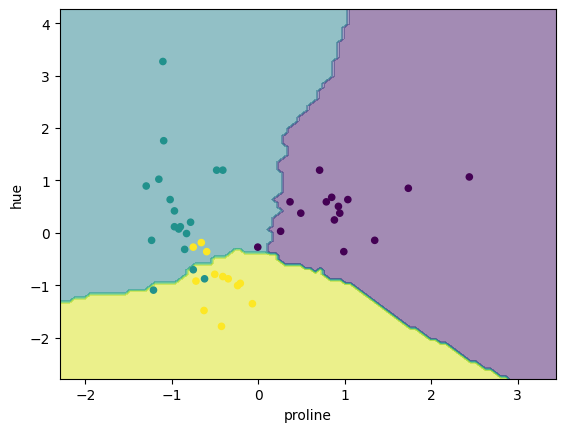

In [141]:
fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
    model_scaled,
    x_test_scaled,
    response_method="predict",
    alpha=0.5,
    ax=ax,
)
disp.ax_.scatter(x_test_scaled["proline"], x_test_scaled["hue"], c=y_test, s=20)

3) Confusion-Matrix für das skalierte Test-Set errechnen

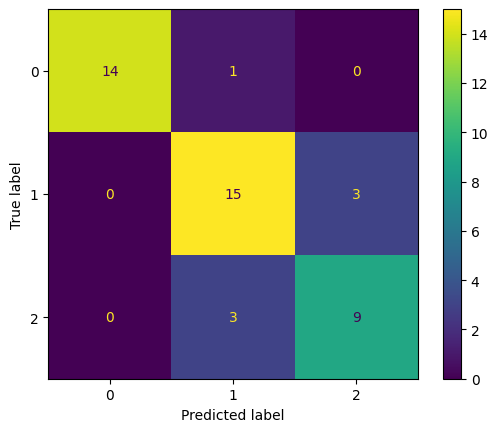

In [142]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, model_scaled.predict(x_test_scaled)))
cm.plot()